<a href="https://colab.research.google.com/github/adihebbalae/AI-stuff/blob/main/Adi_Hebbalae_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install scikeras
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from collections import Counter
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
from scikeras.wrappers import KerasClassifier  # Import from scikeras.wrappers
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


def categorical_to_numpy(labels_in):
  labels = []
  for label in labels_in:
    if label == 'dog':
      labels.append(np.array([1, 0]))
    else:
      labels.append(np.array([0, 1]))
  return np.array(labels)

def one_hot_encoding(input):
  output = np.array(input)
  output = np.zeros((input.size, input.max()+1))
  output[np.arange(input.size),input] = 1

  return output


def load_data():
  # Run this cell to download our data into a file called 'cifar_data'
  !wget -O cifar_data https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%204%20_%205%20-%20Neural%20Networks%20_%20CNN/dogs_v_roads

  # now load the data from our cloud computer
  import pickle
  data_dict = pickle.load(open( "cifar_data", "rb" ));

  data   = data_dict['data']
  labels = data_dict['labels']

  return data, labels

def plot_one_image(data, labels, img_idx):
  from google.colab.patches import cv2_imshow
  import cv2
  import matplotlib.pyplot as plt
  my_img   = data[img_idx, :].squeeze().reshape([32,32,3]).copy()
  my_label = labels[img_idx]
  print('label: %s'%my_label)
  fig, ax = plt.subplots(1,1)

  img = ax.imshow(my_img.astype('uint8'), extent=[-1,1,-1,1])

  x_label_list = [0, 8, 16, 24, 32]
  y_label_list = [0, 8, 16, 24, 32]

  ax.set_xticks([-1, -0.5, 0, 0.5, 1])
  ax.set_yticks([-1, -0.5, 0, 0.5, 1])

  ax.set_xticklabels(x_label_list)
  ax.set_yticklabels(y_label_list)

  fig.show(img)

def CNNClassifier(num_epochs=30, layers=4, dropout=0.5):
  def create_model():
    model = Sequential()
    model.add(Reshape((32, 32, 3)))

    for i in range(layers):
      model.add(Conv2D(32, (3, 3), padding='same'))
      model.add(Activation('relu'))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    # initiate RMSprop optimizer
    opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model
  return KerasClassifier(build_fn=create_model, epochs=num_epochs, batch_size=10, verbose=2)

def plot_acc(history, ax = None, xlabel = 'Epoch #'):
    history = history.history
    history.update({'epoch':list(range(len(history['val_accuracy'])))})
    history = pd.DataFrame.from_dict(history)

    best_epoch = history.sort_values(by = 'val_accuracy', ascending = False).iloc[0]['epoch']

    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
    ax.axhline(0.5, linestyle = '--',color='red', label = 'Chance')
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')
    ax.legend(loc = 7)
    ax.set_ylim([0.4, 1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Accuracy (Fraction)')

    plt.show()

In [10]:
data, labels = load_data()

--2024-12-22 00:45:37--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%204%20_%205%20-%20Neural%20Networks%20_%20CNN/dogs_v_roads
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3689015 (3.5M) [application/octet-stream]
Saving to: ‘cifar_data’

cifar_data          100%[===================>]   3.52M  --.-KB/s    in 0.04s   

2024-12-22 00:45:38 (96.4 MB/s) - ‘cifar_data’ saved [3689015/3689015]



label: dog


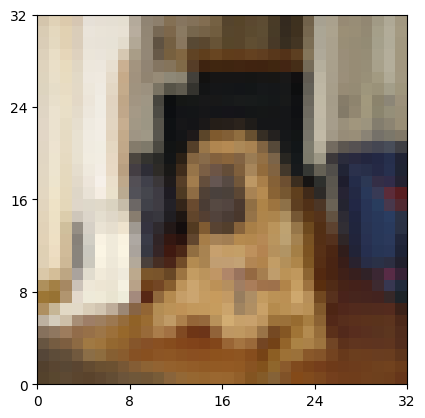

In [11]:
plot_one_image(data, labels, 9) #change this number

label: dog


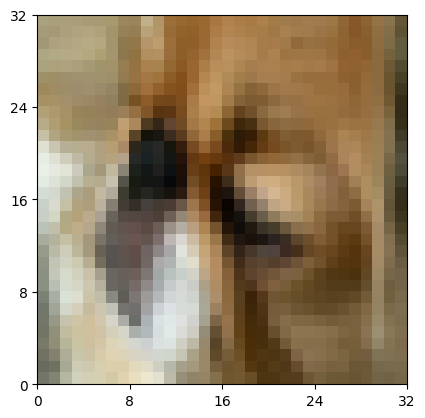

In [12]:
plot_one_image(data, labels, 12) #change this number

In [13]:
print (len(data))
print(Counter(labels))

1200
Counter({'dog': 600, 'road': 600})


In [14]:
print('One image looks like: ')
print(data[0])
print("Length of list: ", len(data[0]))

One image looks like: 
[45 20 19 ... 83 99 31]
Length of list:  3072


In [15]:
print ('Data shape:', data.shape)
print ('Data:', data)

Data shape: (1200, 3072)
Data: [[ 45  20  19 ...  83  99  31]
 [101 114  35 ... 155 134  91]
 [213 221 221 ... 139  58  47]
 ...
 [126 174 202 ... 124 128 129]
 [191 232 240 ...  74  93  81]
 [237 248 254 ...  45  56  10]]


In [16]:
# Preparing data and create training and test inputs and labels
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, labels, test_size=0.2, random_state = 1)

# Initialize our model
knn_model = KNeighborsClassifier(n_neighbors = 12)

# Train our model
knn_model.fit(X_train, y_train)
# Test our model
y_pred = knn_model.predict(X_test)
# Print the score on the testing data
acc = accuracy_score(y_test, y_pred)
print(acc)
### END CODE

0.8375


label: road
prediction: road


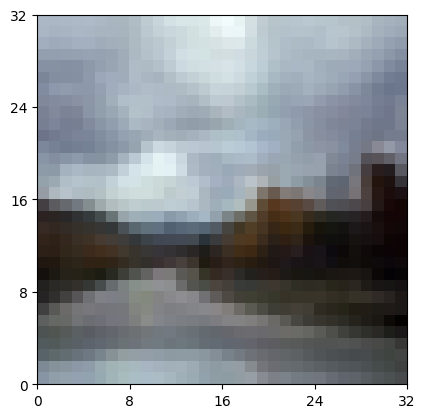

In [17]:
# Specify which image you want to show
image_id = 1 #Change this!

# Visualize the image
plot_one_image(X_test, y_test, image_id)

# Use the model to predict what this might be and print it
print('prediction:', knn_model.predict([X_test[image_id]])[0])

In [18]:
for i in range(1, 30):

  X_train, X_test, y_train, y_test = model_selection.train_test_split(data, labels, test_size=0.2, random_state=1)

  knn_model = KNeighborsClassifier(i)


  knn_model.fit(X_train, y_train)

  y_pred = knn_model.predict(X_test)

  acc = accuracy_score(y_test, y_pred)
  print(acc)



0.8
0.8916666666666667
0.8
0.8666666666666667
0.7916666666666666
0.8375
0.8
0.8375
0.7916666666666666
0.8291666666666667
0.8166666666666667
0.8375
0.8208333333333333
0.8458333333333333
0.825
0.8375
0.8166666666666667
0.825
0.8125
0.825
0.8041666666666667
0.8166666666666667
0.8125
0.8333333333333334
0.8166666666666667
0.8208333333333333
0.8125
0.825
0.8041666666666667


TRUE POSITIVES
label: dog
label: dog
label: dog
label: dog
FALSE POSITIVES
label: road
TRUE NEGATIVES
label: dog
label: dog
label: dog
label: dog
FALSE POSITIVES
label: road
label: road
label: road
label: road


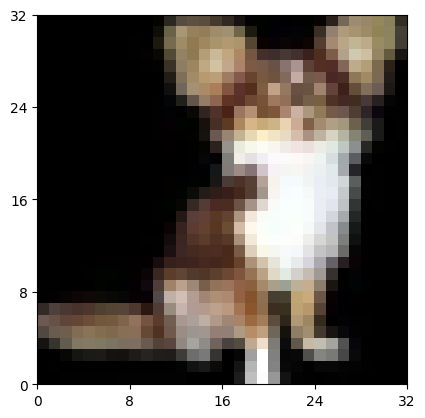

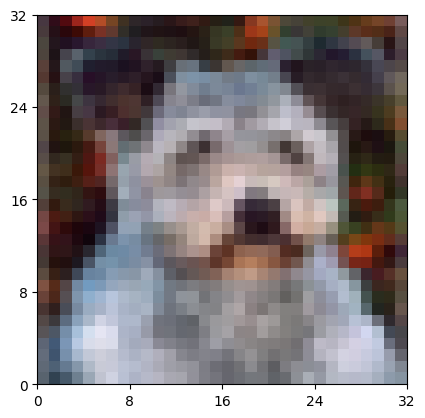

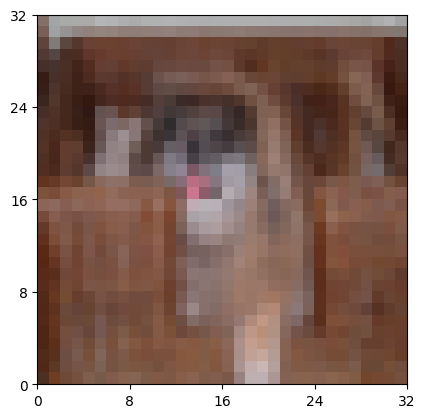

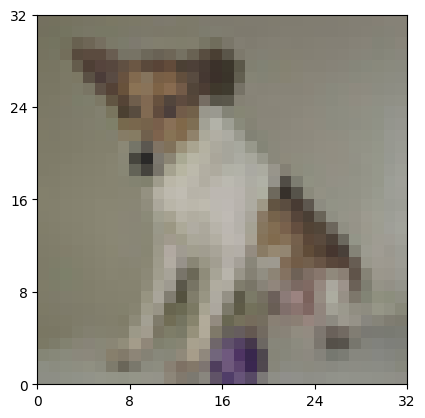

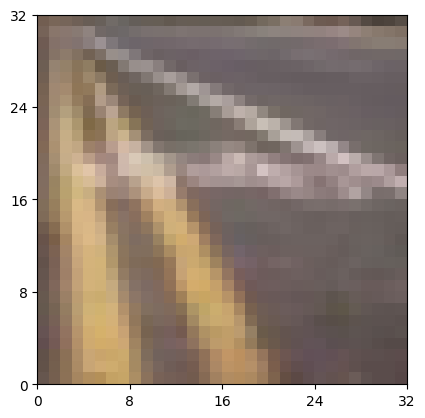

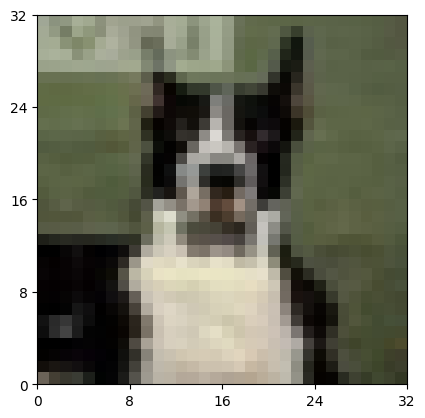

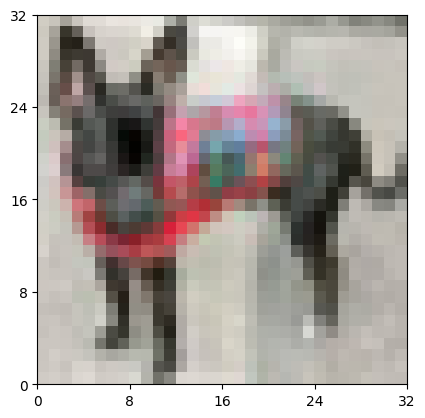

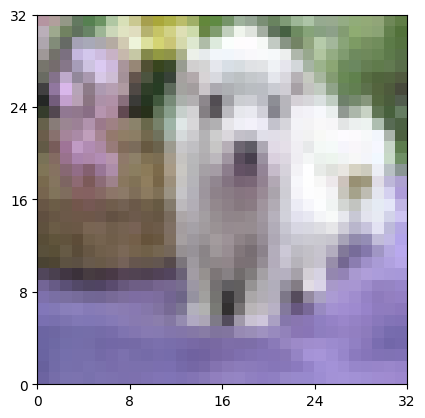

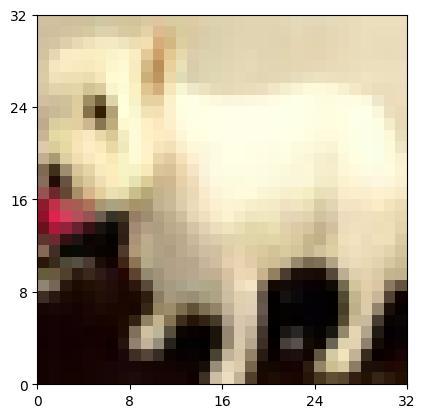

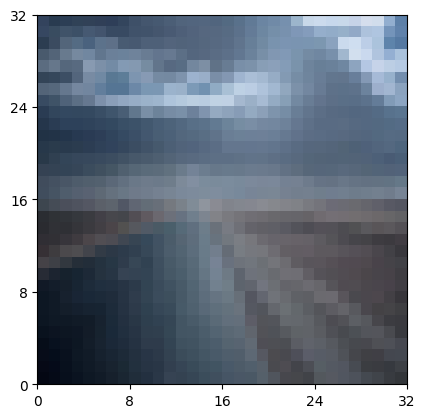

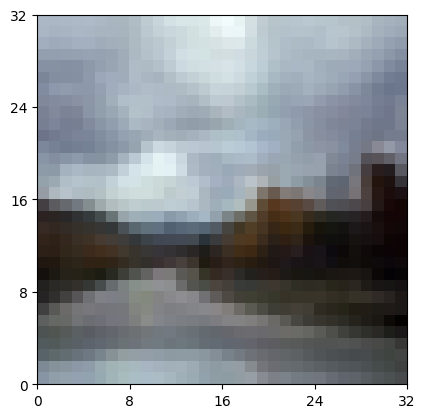

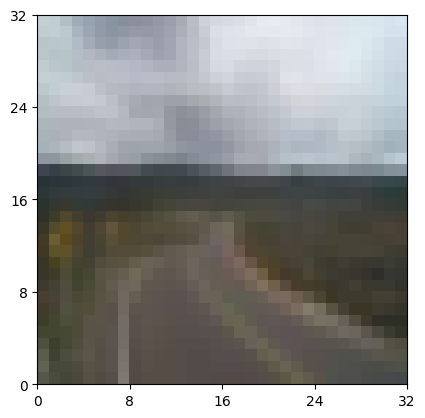

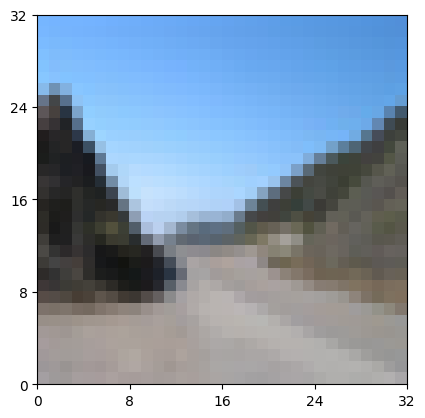

In [19]:
#True Positives (code provided)
tp_count = 0
print ("TRUE POSITIVES")
i = 0
while tp_count < 4 and i < len(X_test):
  prediction = knn_model.predict([X_test[i]])[0]
  if prediction == y_test[i] and prediction == 'dog':
    plot_one_image(X_test, y_test, i)
    tp_count += 1
  i += 1

#False Positives
#YOUR CODE HERE
fp_count = 0
print ("FALSE POSITIVES")
i = 0
while fp_count < 4 and i < len(X_test):
  prediction = knn_model.predict([X_test[i]])[0]
  if prediction != y_test[i] and prediction == 'dog':
    plot_one_image(X_test, y_test, i)
    fp_count += 1
  i += 1
#True Negatives
#YOUR CODE HERE
tn_count = 0
print ("TRUE NEGATIVES")
i = 0
while tn_count < 4 and i < len(X_test):
  prediction = knn_model.predict([X_test[i]])[0]
  if prediction != y_test[i] and prediction != 'dog':
    plot_one_image(X_test, y_test, i)
    tn_count += 1
  i += 1
#False Negatives
fn_count = 0
print ("FALSE POSITIVES")
i = 0
while fn_count < 4 and i < len(X_test):
  prediction = knn_model.predict([X_test[i]])[0]
  if prediction == y_test[i] and prediction != 'dog':
    plot_one_image(X_test, y_test, i)
    fn_count += 1
  i += 1
#YOUR CODE HERE

In [20]:
# Create and train our multi layer perceptron model
nnet = MLPClassifier(hidden_layer_sizes=(3, 3, 3), random_state=1, max_iter=10000000)  ## How many hidden layers? How many neurons does this have?
nnet.fit(X_train, y_train)

# Predict what the classes are based on the testing data
predictions = nnet.predict(X_test)

# Print the score on the testing data
print("MLP Testing Accuracy:")
print(accuracy_score(y_test, predictions)*100)

MLP Testing Accuracy:
47.083333333333336


In [21]:
nnet = MLPClassifier(hidden_layer_sizes=(10), random_state = 1, max_iter = 1000000)
nnet.fit(X_train, y_train)
pred = nnet.predict(X_test)

print(accuracy_score(y_test, pred)*100)

52.916666666666664


In [22]:
for i in range(1, 10):
  nnet = MLPClassifier(hidden_layer_sizes=(i), random_state = 1, max_iter = 1000000)
  nnet.fit(X_train, y_train)
  pred = nnet.predict(X_test)

  print(accuracy_score(y_test, pred)*100)

52.916666666666664
52.916666666666664
47.083333333333336
47.083333333333336
47.083333333333336
47.083333333333336
52.916666666666664
47.083333333333336
52.916666666666664


In [23]:
# convert our data to floats for our CNN
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Create and train our cnn
cnn = CNNClassifier(num_epochs=3)
cnn.fit(X_train, y_train)
# Predict what the classes are based on the testing data
pred = cnn.predict(X_test)
# Print the score on the testing data
print(accuracy_score(y_test, pred)*100)



ImportError: `keras.optimizers.legacy` is not supported in Keras 3. When using `tf.keras`, to continue using a `tf.keras.optimizers.legacy` optimizer, you can install the `tf_keras` package (Keras 2) and set the environment variable `TF_USE_LEGACY_KERAS=True` to configure TensorFlow to use `tf_keras` when accessing `tf.keras`.

In [ ]:

X_train = X_train.astype(float)
X_test = X_test.astype(float)

cnn = CNNClassifier(num_epochs=10)



history = cnn.fit(X_train, categorical_to_numpy(y_train), validation_data=(X_test, categorical_to_numpy(y_test)))
#plot_acc(history)


In [ ]:
image_index = 29 #pick any image you'd like
input_image = X_test[image_index]
print (input_image.shape)
print (input_image) #How many numbers are there? What does each represent?

plt.imshow(input_image.reshape(32,32,3).astype(int))
plt.show()

print ('Classification:')
print(cnn.predict(np.array([input_image]))) #Our predict function expects a 2D array.
#0 means dog, 1 means road


In [ ]:
#Warning: expect a large output!
for layer_weights in history.model.weights:
  print (layer_weights)

In [ ]:
pred = cnn.predict_proba(np.array([input_image])) #What does each number mean?
print (pred)
dog_prob = pred[0][0] #This is the probability we'll use (if we know dog prob, we know the classification)

print ('Probability of dog:')
print (dog_prob)

In [ ]:
saliencies = [] #eventually, will be the same size as input_image

for index, pixel in enumerate(input_image):
  #index counts up from 0, pixel is between 0 and 255

  if index%100 == 0: #will track progress - this might take a while
    print(index)

  changed_input = input_image.copy() #make sure not to change the original input_image!
  #YOUR CODE HERE:
  D_list = []
  #In changed_input, change the value of this pixel by some amount.

  #Use the CNN to classify changed_input.
  #Calculate the value of D.
  #Repeat with various-size changes, and calculate saliency as the average D.
  saliency = 0 #Change this!

  saliencies.append(saliency)

print(saliencies)

In [ ]:
sal_array = np.array(saliencies)
print (sal_array.min(), sal_array.max())
print (sal_array.shape)

In [ ]:
sal_array = np.array(saliencies)
sal_array = sal_array - sal_array.min()
#TODO print min and max

sal_array = sal_array/sal_array.max()
#TODO print min and max

print (sal_array.shape)

In [ ]:
#Plot our original image
plt.imshow(input_image.reshape(32,32,3).astype(int))
plt.show()

#Plot our saliency map: the brighter, the higher the saliency
plt.imshow(sal_array.reshape(32,32,3))
plt.show()

#Plot our saliency map superimposed on the image
plt.imshow(input_image.reshape(32,32,3).astype(int))
plt.imshow(sal_array.reshape(32,32,3),alpha=0.6)
plt.show()